In [1]:
from __future__ import print_function
import torch
from torch import nn, optim
from torch.autograd import Variable
import torch.nn.functional as F
import torch.distributions as dist
from torchvision import datasets, transforms
import torch.utils.data as utils

import numpy as np
from tqdm import tqdm_notebook as tqdm

from matplotlib import pyplot as plt

In [2]:
from models import *

In [3]:
train_7x7 = np.load('kernels/kernels_7x7.npy').reshape(-1,1,7,7)
train_7x7_dataset = utils.TensorDataset(torch.Tensor(train_7x7))
train_7x7_loader = utils.DataLoader(train_7x7_dataset, batch_size=128, shuffle=True)

train_5x5 = np.load('kernels/kernels_5x5.npy').reshape(-1,1,5,5)
train_5x5_dataset = utils.TensorDataset(torch.Tensor(train_5x5))
train_5x5_loader = utils.DataLoader(train_5x5_dataset, batch_size=128, shuffle=True)

In [4]:
vae7x7 = VAE7x7(32,2)
optimizer7x7 = optim.Adam(vae7x7.parameters())
vae7x7.cuda()

vae5x5 = VAE5x5(64,6)
optimizer5x5 = optim.Adam(vae5x5.parameters())
vae5x5.cuda()

None

In [5]:
def train_vae_n_epochs(vae, optimizer, train_loader, n=1):
    for epoch in tqdm(range(n)):
        train_loss = 0
        vae.train()
        for batch_idx, (x,) in enumerate(train_loader):
            x = x.cuda()
            optimizer.zero_grad()
            loss = vae.elbo(x, beta=1.)
            train_loss += loss.item()
            loss.backward()
            optimizer.step()
            #print(loss.item())
        print(train_loss / len(train_loader))

In [6]:
train_vae_n_epochs(vae7x7, optimizer7x7, train_7x7_loader, n=30)

-5868.262773081462
-11145.653502604167
-13542.762721354167
-14447.645390625
-14840.081901041667
-15106.449674479167
-15252.888567708333
-15335.2382421875
-15454.771484375
-15500.770104166666
-15537.341145833334
-15608.2841796875
-15650.5703125
-15668.100911458334
-15729.204596354166
-15766.813463541666
-15808.983411458334
-15863.909322916666
-15896.401497395833
-15941.415052083334
-15949.862825520833
-16030.927630208333
-16061.8820703125
-16098.5229296875
-16159.1434375
-16210.8598046875
-16280.660221354166
-16298.146614583333
-16328.895325520833
-16440.998294270834



In [7]:
train_vae_n_epochs(vae5x5, optimizer5x5, train_5x5_loader, n=2)

-14101.330986670428
-14464.070051008244



In [8]:
def f(i):
    fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2)
    ax1.imshow(x.cpu().data.numpy()[i,0,:,:])
    ax2.imshow(x_mean.cpu().data.numpy()[i,0,:,:])
    plt.show()
    
def g(n):
    xs_gen = vae.generate(n=n)
    for i, x in enumerate(xs_gen):
        plt.imshow(x.cpu().data.numpy()[0,:,:])
        plt.show()

#### vae7x7 check

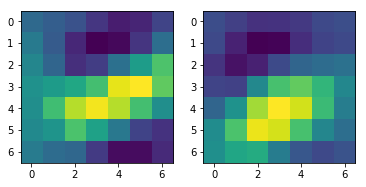

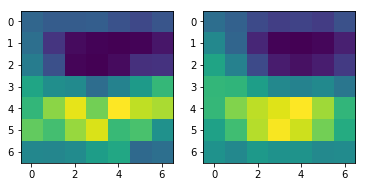

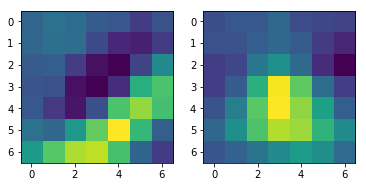

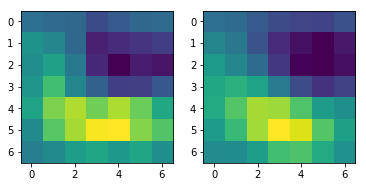

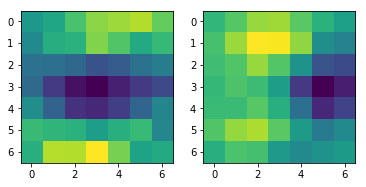

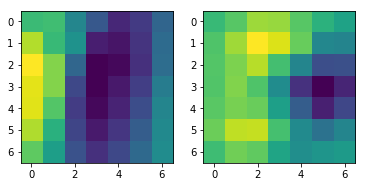

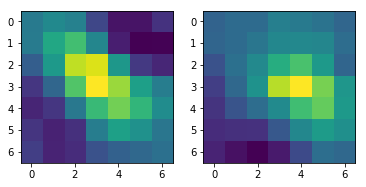

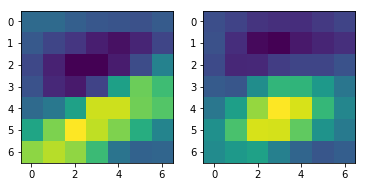

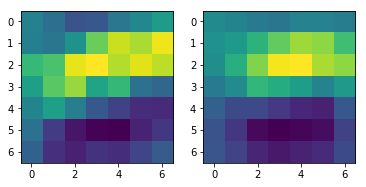

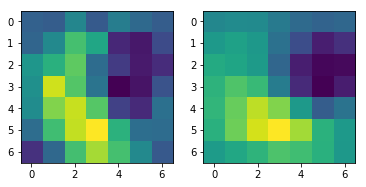

In [298]:
x = next(enumerate(train_7x7_loader))[1][0].cuda()
z_mean, z_logvar, z, x_mean, x_logvar = vae7x7(x)

vae = vae7x7

for i in range(10):
    f(i)

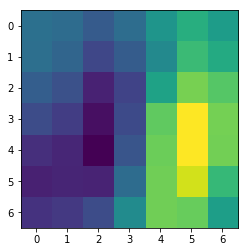

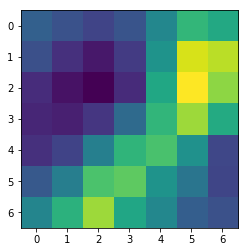

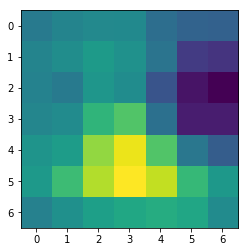

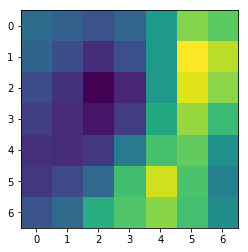

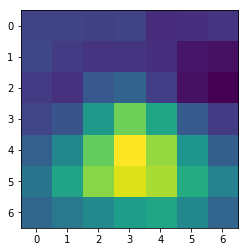

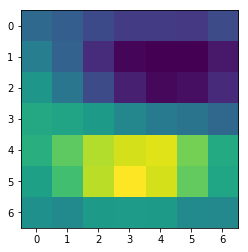

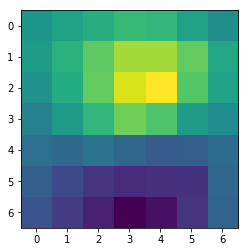

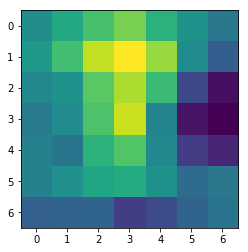

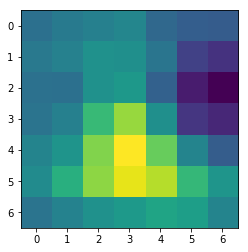

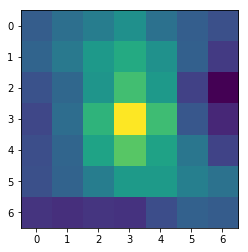

In [10]:
g(10)

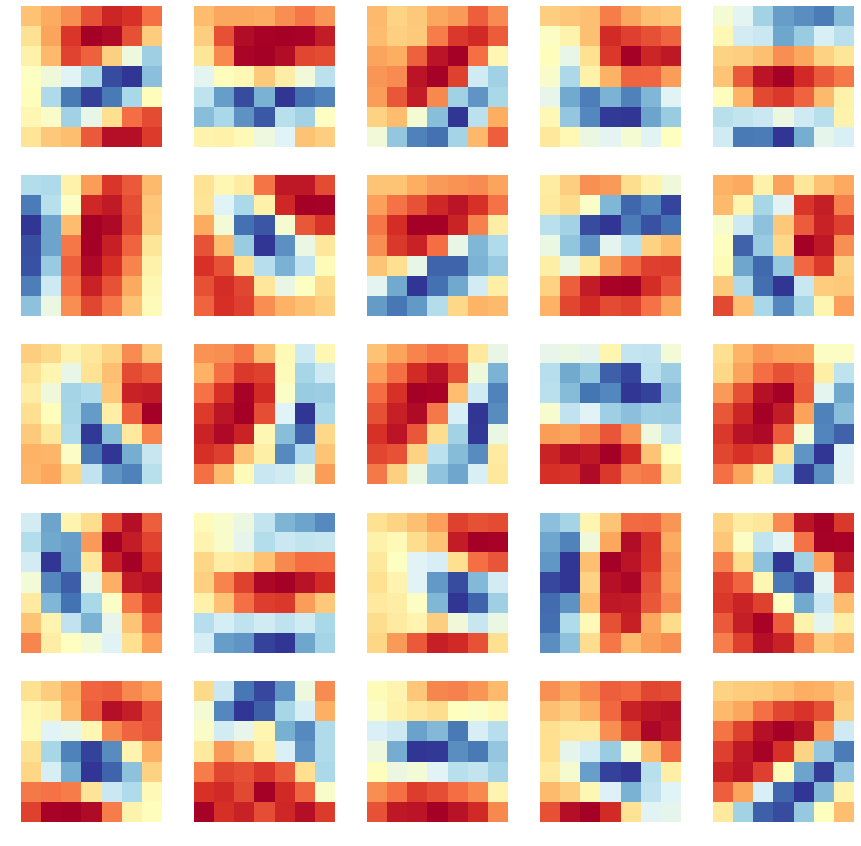

In [332]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=[15,15])
axes = np.array(axes).flatten()

for i, ax in enumerate(axes):
    t = ax.imshow(x.cpu().data.numpy()[i,0,:,:])
    t.set_cmap('RdYlBu')
    ax.axis('off')
plt.show()
fig.savefig('original_7x7.png', dpi=300)

In [328]:
xs_gen = vae.generate(n=25)

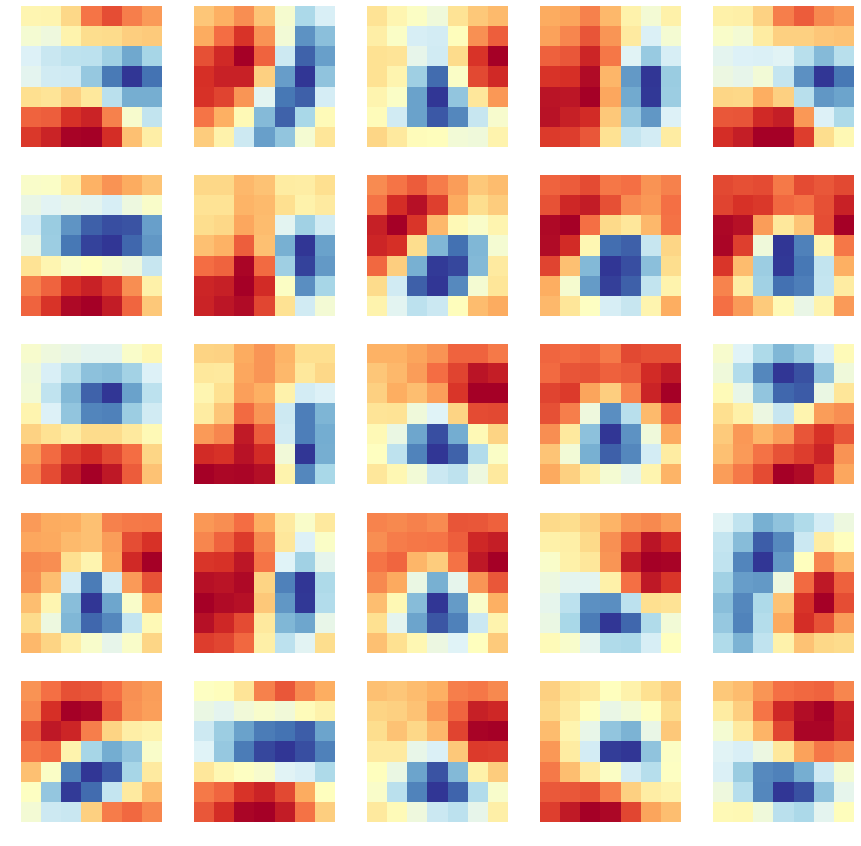

In [333]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=[15,15])
axes = np.array(axes).flatten()

for i, ax in enumerate(axes):
    t = ax.imshow(xs_gen.cpu().data.numpy()[i,0,:,:])
    t.set_cmap('RdYlBu')
    ax.axis('off')
plt.show()
fig.savefig('generated_7x7.png', dpi=300)

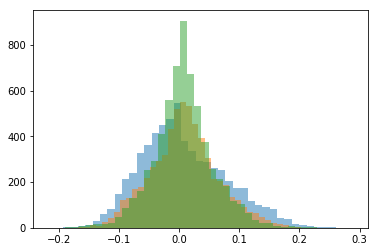

In [11]:
z_mean, z_logvar, z, x_mean, x_logvar = vae(x)

plt.hist(x.cpu().data.numpy().flatten(), bins=40, alpha=0.5)
plt.hist(x_mean.cpu().data.numpy().flatten(), bins=40, alpha=0.5)
plt.hist(vae.generate(n=x.shape[0]).cpu().data.numpy().flatten(), bins=40, alpha=0.5)
plt.show()

In [295]:
vae7x7

VAE7x7(
  (encoder): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ELU(alpha=1.0)
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (3): ELU(alpha=1.0)
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (5): ELU(alpha=1.0)
    (6): Conv2d(64, 4, kernel_size=(1, 1), stride=(1, 1))
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(2, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ELU(alpha=1.0)
    (2): ConvTranspose2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (3): ELU(alpha=1.0)
    (4): ConvTranspose2d(64, 32, kernel_size=(3, 3), stride=(1, 1))
    (5): ELU(alpha=1.0)
    (6): Conv2d(32, 2, kernel_size=(1, 1), stride=(1, 1))
  )
)

#### vae5x5 check

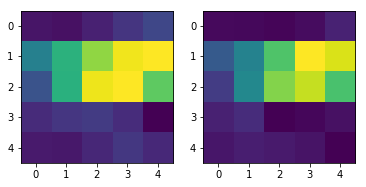

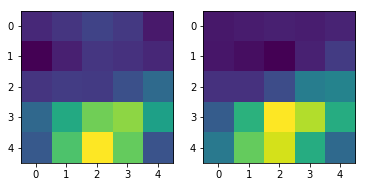

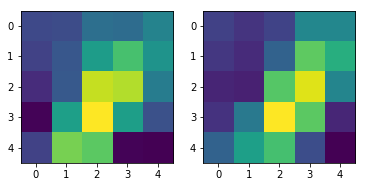

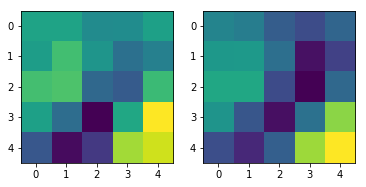

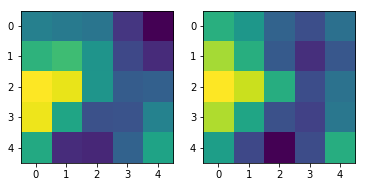

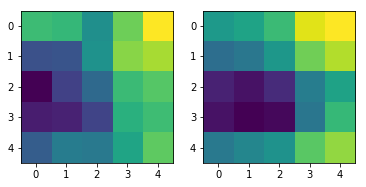

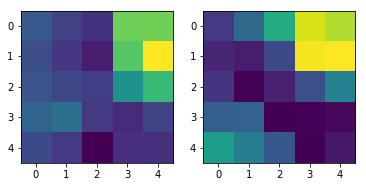

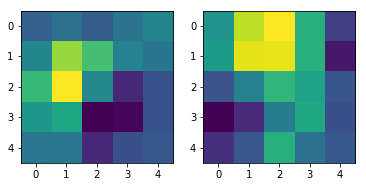

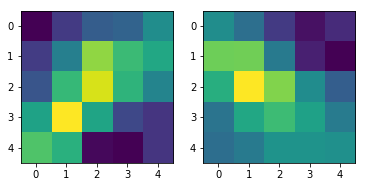

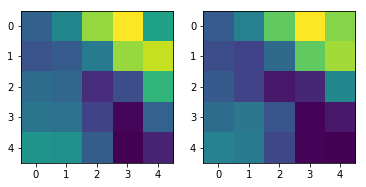

In [334]:
x = next(enumerate(train_5x5_loader))[1][0].cuda()
z_mean, z_logvar, z, x_mean, x_logvar = vae5x5(x)

vae = vae5x5

for i in range(10):
    f(i)

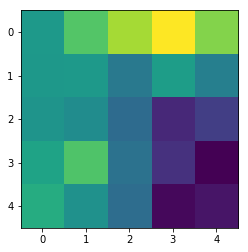

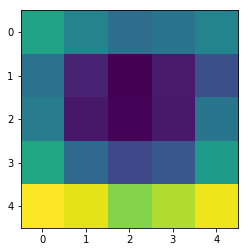

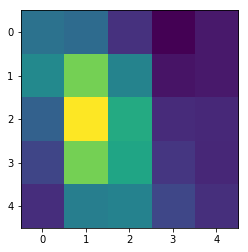

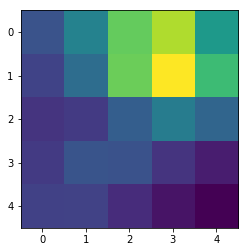

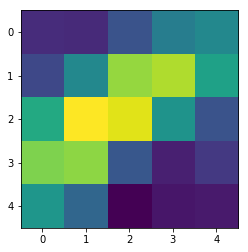

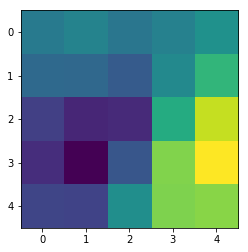

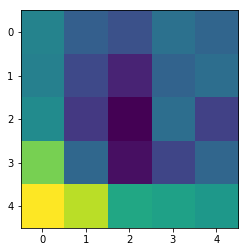

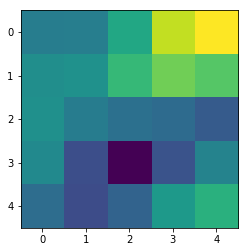

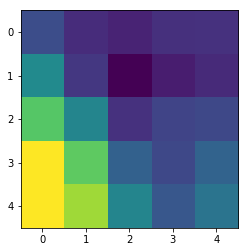

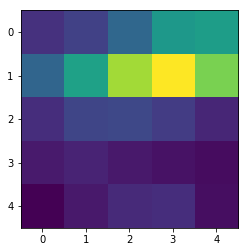

In [13]:
g(10)

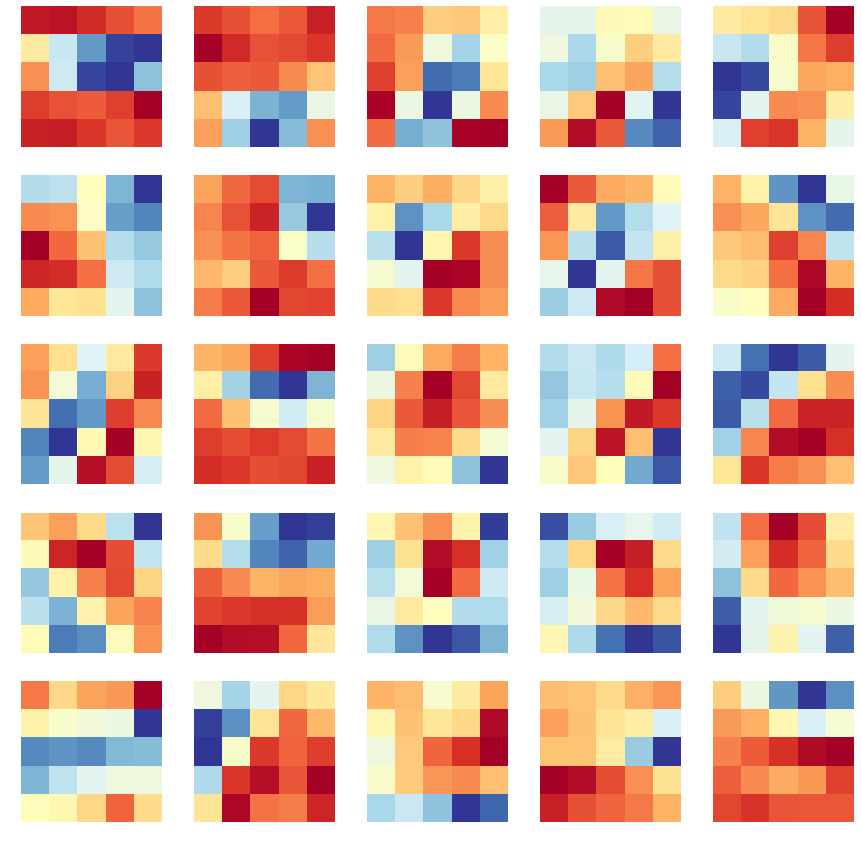

In [335]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=[15,15])
axes = np.array(axes).flatten()

for i, ax in enumerate(axes):
    t = ax.imshow(x.cpu().data.numpy()[i,0,:,:])
    t.set_cmap('RdYlBu')
    ax.axis('off')
plt.show()
fig.savefig('original_5x5.png', dpi=300)

In [336]:
xs_gen = vae.generate(n=25)

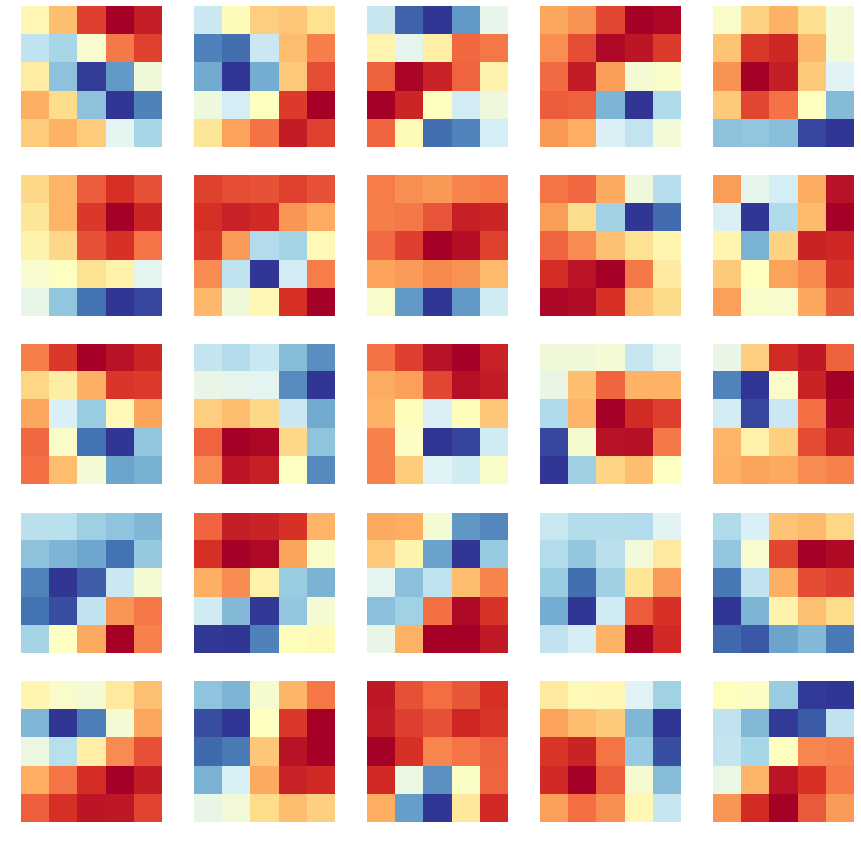

In [337]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=[15,15])
axes = np.array(axes).flatten()

for i, ax in enumerate(axes):
    t = ax.imshow(xs_gen.cpu().data.numpy()[i,0,:,:])
    t.set_cmap('RdYlBu')
    ax.axis('off')
plt.show()
fig.savefig('generated_5x5.png', dpi=300)

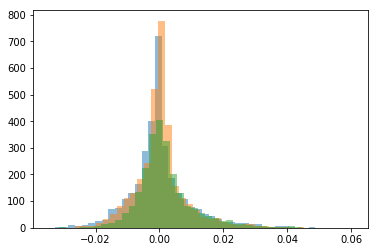

In [14]:
z_mean, z_logvar, z, x_mean, x_logvar = vae(x)

plt.hist(x.cpu().data.numpy().flatten(), bins=40, alpha=0.5)
plt.hist(x_mean.cpu().data.numpy().flatten(), bins=40, alpha=0.5)
plt.hist(vae.generate(n=96).cpu().data.numpy().flatten(), bins=40, alpha=0.5)
plt.show()

In [282]:
class BayesConv2d(nn.Module):
    def __init__(self, input_dim, output_dim, kernel_size, stride, bias=False):
        super(BayesConv2d, self).__init__()
        
        self.kernel_size = kernel_size
        
        self.mean = nn.Conv2d(input_dim, output_dim, kernel_size, stride, bias=bias)
        self.logvar = nn.Conv2d(input_dim, output_dim, kernel_size, stride, bias=bias)
        
    def forward(self, input):
        if self.training == False:
            return self.mean(input)

        if model.training:
            conv = dist.Normal(self.mean.weight, self.logvar.weight.mul(0.5).exp_()).rsample()
            ans = F.conv2d(input, conv)
        else:
            ans = self.mean(input)
        
#         if model.training:
#             mean, logvar = self.mean(input), self.logvar(input)
#             ans = dist.Normal(mean, logvar.mul(0.5).exp_()).rsample()
#         else:
#             ans = self.mean(input)
            
        return ans

    def kl(self, vae):
        
        if self.mode == 'dwp':
            q_mean, q_logvar = self.q_params()

            q = dist.Normal(
                q_mean.view(-1, 1, self.kernel_size, self.kernel_size),
                q_logvar.mul(0.5).exp_().view(-1, 1, self.kernel_size, self.kernel_size)
            )
            entropy = q.entropy().sum()

            kl_z, logp_theta = 0, 0

            for _ in range(10):
                w = q.rsample()

                with torch.no_grad(): 
                    z_mean, z_logvar, z, w_mean, w_logvar = vae(w)

                logp_theta += dist.Normal(w_mean, w_logvar.mul(0.5).exp_()).log_prob(w).sum()

                z_posterior = dist.Normal(z_mean, z_logvar.mul(0.5).exp_())
                z_prior = dist.Normal(torch.FloatTensor([0.]).cuda(), torch.FloatTensor([1.]).cuda())
                kl_z += dist.kl_divergence(z_posterior, z_prior).sum()


                #print(self.kernel_size, -entropy.item(), - logp_theta.item(), kl_z.item())

            return (-entropy + kl_z/10 - logp_theta/10)
        
        elif self.mode == 'gaussian':
            
            q_mean, q_logvar = self.q_params()

            q = dist.Normal(
                q_mean.view(-1, 1, self.kernel_size, self.kernel_size),
                q_logvar.mul(0.5).exp_().view(-1, 1, self.kernel_size, self.kernel_size)
            )

            prior = dist.Normal(torch.FloatTensor([0.]).cuda(), torch.FloatTensor([1.]).cuda())
            kl = dist.kl_divergence(q, prior).sum()

            return kl
        
        elif self.mode == 'log-uniform':
            
            q_mean, q_logvar = self.q_params()
            
            k1, k2, k3 = 0.63576, 1.87320, 1.48695
            log_alpha = 2 * (q_logvar - torch.log(torch.abs(q_mean) + 1e-12))

            kl = -k1 * torch.sigmoid(k2 + k3 * log_alpha) + 0.5 * torch.log1p(torch.exp(-log_alpha))
            kl = kl.sum()
            
            return kl
            
        else: raise Exception('Not Implemented')

    def q_params(self):
        return self.mean.weight, self.logvar.weight
    
class BayesNet(nn.Module):
    def __init__(self):
        super(BayesNet, self).__init__()
        self.conv1 = BayesConv2d(1, 32, 7, 1, bias=False)
        self.conv2 = BayesConv2d(32, 128, 5, 1, bias=False)
        self.fc1 = nn.Linear(3*3*128, 10)

    def forward(self, x):
        x = F.leaky_relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.leaky_relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 3*3*128)
        x = self.fc1(x)
        
        return x

In [283]:
vae5x5.eval()
vae7x7.eval()

for p in vae7x7.parameters():
    p.requires_grad = False

for p in vae5x5.parameters():
    p.requires_grad = False

In [284]:
def train_and_get_accs_every_10_epochs(model, optimizer, n_epochs=101, mode='dwp'):
    
    list(model.children())[0].mode = mode
    list(model.children())[1].mode = mode
    
    accs = []
    for epoch in tqdm(range(1,n_epochs)):      
        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.cuda(), target.cuda()
            optimizer.zero_grad()
            output = model(data)
            loss = F.cross_entropy(output, target, reduction='sum') * len(train_loader)
            #torch.nn.utils.clip_grad_norm_(model.parameters(), 1000)
            loss += list(model.children())[0].kl(vae7x7) * 1
            loss += list(model.children())[1].kl(vae5x5) * 1        
            loss.backward()
            optimizer.step()

        if epoch % 10 == 0:
            model.eval()
            test_loss = 0
            correct = 0
            with torch.no_grad():
                for data, target in test_loader:
                    data, target = data.cuda(), target.cuda()
                    output = model(data)
                    test_loss += F.cross_entropy(output, target, reduction='sum').item()
                    pred = output.argmax(dim=1, keepdim=True)
                    correct += pred.eq(target.view_as(pred)).sum().item()
            test_loss /= len(test_loader.dataset)
            
            accs.append(100. * correct / len(test_loader.dataset))

        if epoch % 100 == 0:
            print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
                test_loss, correct, len(test_loader.dataset),
                100. * correct / len(test_loader.dataset)))
            
            
    return accs

## Experiment On The Max Accuracy

In [285]:
train_sizes = [50,150,500,1000]
#train_sizes = [50]
    
accs_for_different_train_sizes = {}

In [286]:
for train_size in train_sizes:

    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('./data',
                       train=True,
                       download=True,
                       transform=transforms.ToTensor()
                      ),
        batch_size=32
    )

    train_loader.dataset.data = train_loader.dataset.data[:train_size]

    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('./data', train=False, 
                       transform=transforms.ToTensor()
                      ),
        batch_size=128
    )
    
    
    model = BayesNet()
    model.cuda()
    optimizer = optim.Adam(model.parameters())

    accs_dwp = train_and_get_accs_every_10_epochs(model,
                                                  optimizer,
                                                  n_epochs=100000 // len(train_loader.dataset),
                                                  mode='dwp')
    
    
    model = BayesNet()
    model.cuda()
    optimizer = optim.Adam(model.parameters())

    accs_gauss = train_and_get_accs_every_10_epochs(model,
                                                    optimizer,
                                                    mode='gaussian',
                                                    n_epochs=100000 // len(train_loader.dataset),)
    
    model = BayesNet()
    model.cuda()
    optimizer = optim.Adam(model.parameters())

    accs_logunif = train_and_get_accs_every_10_epochs(model,
                                                    optimizer,
                                                    mode='log-uniform',
                                                    n_epochs=100000 // len(train_loader.dataset),)
    
    
    accs_for_different_train_sizes[train_size] = {'gaussian':accs_gauss,
                                                  'dwp':accs_dwp,
                                                  'log-uniform':accs_logunif}


Test set: Average loss: 26.1989, Accuracy: 1641/10000 (16%)


Test set: Average loss: 71.4998, Accuracy: 3690/10000 (37%)


Test set: Average loss: 98.4341, Accuracy: 4331/10000 (43%)


Test set: Average loss: 135.4194, Accuracy: 4354/10000 (44%)


Test set: Average loss: 225.3121, Accuracy: 3468/10000 (35%)


Test set: Average loss: 179.1080, Accuracy: 4300/10000 (43%)


Test set: Average loss: 169.5205, Accuracy: 4534/10000 (45%)


Test set: Average loss: 173.2868, Accuracy: 4805/10000 (48%)


Test set: Average loss: 191.3230, Accuracy: 4844/10000 (48%)


Test set: Average loss: 204.0431, Accuracy: 4860/10000 (49%)


Test set: Average loss: 296.2535, Accuracy: 4457/10000 (45%)


Test set: Average loss: 275.0393, Accuracy: 4355/10000 (44%)


Test set: Average loss: 179.4479, Accuracy: 4928/10000 (49%)


Test set: Average loss: 229.4182, Accuracy: 4785/10000 (48%)


Test set: Average loss: 203.6616, Accuracy: 5100/10000 (51%)


Test set: Average loss: 254.5396, Accuracy: 4688/10000 (4


Test set: Average loss: 2.3046, Accuracy: 1319/10000 (13%)


Test set: Average loss: 2.2948, Accuracy: 1422/10000 (14%)


Test set: Average loss: 2.2987, Accuracy: 1081/10000 (11%)


Test set: Average loss: 2.3306, Accuracy: 1337/10000 (13%)


Test set: Average loss: 2.3073, Accuracy: 1710/10000 (17%)


Test set: Average loss: 2.3554, Accuracy: 1804/10000 (18%)


Test set: Average loss: 2.3137, Accuracy: 1906/10000 (19%)


Test set: Average loss: 2.5186, Accuracy: 1382/10000 (14%)


Test set: Average loss: 2.4523, Accuracy: 1488/10000 (15%)


Test set: Average loss: 2.4080, Accuracy: 1819/10000 (18%)


Test set: Average loss: 2.4205, Accuracy: 1821/10000 (18%)


Test set: Average loss: 2.4981, Accuracy: 1784/10000 (18%)


Test set: Average loss: 2.8877, Accuracy: 2111/10000 (21%)


Test set: Average loss: 2.5398, Accuracy: 1887/10000 (19%)


Test set: Average loss: 2.4788, Accuracy: 1691/10000 (17%)


Test set: Average loss: 2.2158, Accuracy: 2400/10000 (24%)


Test set: Average loss:


Test set: Average loss: 2.2987, Accuracy: 1086/10000 (11%)


Test set: Average loss: 2.3199, Accuracy: 1415/10000 (14%)


Test set: Average loss: 2.2808, Accuracy: 1652/10000 (17%)


Test set: Average loss: 2.2871, Accuracy: 1399/10000 (14%)


Test set: Average loss: 2.3625, Accuracy: 604/10000 (6%)


Test set: Average loss: 2.2878, Accuracy: 1654/10000 (17%)


Test set: Average loss: 2.3432, Accuracy: 1702/10000 (17%)


Test set: Average loss: 2.3750, Accuracy: 1499/10000 (15%)


Test set: Average loss: 2.3770, Accuracy: 1988/10000 (20%)


Test set: Average loss: 2.3559, Accuracy: 1664/10000 (17%)


Test set: Average loss: 2.3563, Accuracy: 2030/10000 (20%)


Test set: Average loss: 2.5661, Accuracy: 1841/10000 (18%)


Test set: Average loss: 2.8592, Accuracy: 1968/10000 (20%)


Test set: Average loss: 2.5650, Accuracy: 2151/10000 (22%)


Test set: Average loss: 2.3639, Accuracy: 2641/10000 (26%)


Test set: Average loss: 2.3783, Accuracy: 2125/10000 (21%)


Test set: Average loss: 2


Test set: Average loss: 39.4905, Accuracy: 4536/10000 (45%)


Test set: Average loss: 68.3581, Accuracy: 5020/10000 (50%)


Test set: Average loss: 84.7380, Accuracy: 5468/10000 (55%)


Test set: Average loss: 99.7446, Accuracy: 5125/10000 (51%)


Test set: Average loss: 96.6852, Accuracy: 5293/10000 (53%)


Test set: Average loss: 88.8020, Accuracy: 5494/10000 (55%)





Test set: Average loss: 2.3057, Accuracy: 1016/10000 (10%)


Test set: Average loss: 2.3185, Accuracy: 1962/10000 (20%)


Test set: Average loss: 2.3642, Accuracy: 1628/10000 (16%)


Test set: Average loss: 2.4874, Accuracy: 1768/10000 (18%)


Test set: Average loss: 2.8003, Accuracy: 2040/10000 (20%)


Test set: Average loss: 2.4311, Accuracy: 2324/10000 (23%)





Test set: Average loss: 2.2949, Accuracy: 1125/10000 (11%)


Test set: Average loss: 2.3120, Accuracy: 1812/10000 (18%)


Test set: Average loss: 2.2389, Accuracy: 1805/10000 (18%)


Test set: Average loss: 2.3980, Accuracy: 1971/10000 (20%)


Test set: Average loss: 2.4418, Accuracy: 2612/10000 (26%)


Test set: Average loss: 2.8717, Accuracy: 2345/10000 (23%)





Test set: Average loss: 48.1694, Accuracy: 3599/10000 (36%)





Test set: Average loss: 2.1839, Accuracy: 2320/10000 (23%)





Test set: Average loss: 2.2272, Accuracy: 1916/10000 (19%)




In [294]:
"""fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(nrows=2, ncols=2, figsize=[13, 8])
axes = [ax1, ax2, ax3, ax4]

for i,train_size in enumerate(train_sizes):
    ax = axes[i]
    ax.plot(accs_for_different_train_sizes[train_size]['gaussian'], label='gaussian')
    ax.plot(accs_for_different_train_sizes[train_size]['dwp'], label='dwp')
    ax.plot(accs_for_different_train_sizes[train_size]['log-uniform'], label='log-uniform')
    ax.set_ylabel('accuracy on validation')
    ax.set_xlabel('epoch')
    ax.set_title('{} objects in train dataset'.format(train_size))
    ax.legend()
plt.show()"""
None

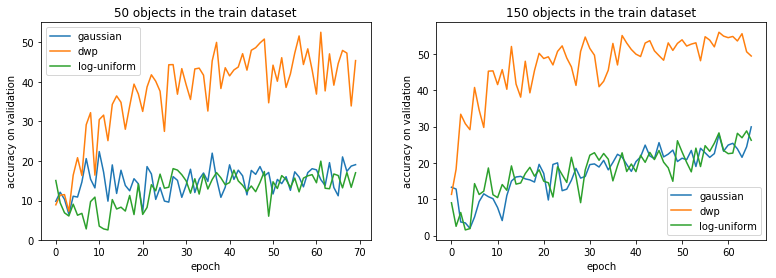

In [292]:
fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=[13, 4])
axes = [ax1, ax2]

for i,train_size in enumerate(train_sizes[:2]):
    ax = axes[i]
    ax.plot(accs_for_different_train_sizes[train_size]['gaussian'][:70], label='gaussian')
    ax.plot(accs_for_different_train_sizes[train_size]['dwp'][:70], label='dwp')
    ax.plot(accs_for_different_train_sizes[train_size]['log-uniform'][:70], label='log-uniform')
    ax.set_ylabel('accuracy on validation')
    ax.set_xlabel('epoch')
    ax.set_title('{} objects in the train dataset'.format(train_size))
    ax.legend()
plt.show()

In [293]:
fig.savefig('small_data.png', dpi=300)

In [262]:
500000 / 50

10000.0

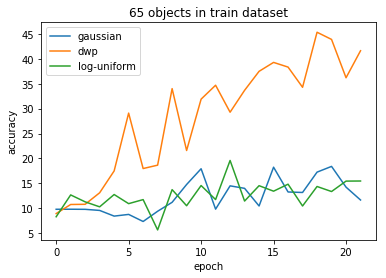

In [228]:
plt.plot(accs_gauss, label='gaussian')
plt.plot(accs_dwp, label='dwp')
plt.plot(accs_logunif, label='log-uniform')
plt.ylabel('accuracy on validation')
plt.xlabel('epoch')
plt.title('{} objects in train dataset'.format(len(train_loader.dataset)))
plt.legend()
plt.show()

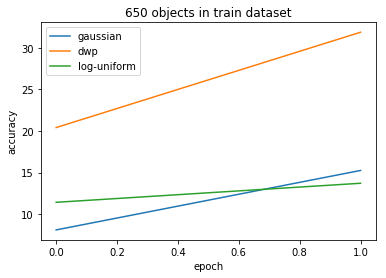

In [235]:
plt.plot(accs_gauss, label='gaussian')
plt.plot(accs_dwp, label='dwp')
plt.plot(accs_logunif, label='log-uniform')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('{} objects in train dataset'.format(len(train_loader.dataset)))
plt.legend()
plt.show()

In [349]:
b.kernel_size

(7, 7)

In [339]:
b = nn.Conv2d(1, 32, 7, 1, bias=False)

In [346]:
b.weight.data = torch.nn.init.xavier_uniform_(b.weight.data)

In [364]:
class SmartInitializedNet(nn.Module):
    def __init__(self):
        super(SmartInitializedNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 7, 1, bias=False)
        self.conv1.training = False
        
        self.conv2 = nn.Conv2d(32, 128, 5, 1, bias=False)
        self.conv2.training = False
        
        self.fc1 = nn.Linear(3*3*128, 10)

    def forward(self, x):
        x = F.leaky_relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.leaky_relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 3*3*128)
        x = self.fc1(x)
        
        return x

In [359]:
init_filters(b, train_7x7)

In [363]:
init_vae(b, vae7x7)

In [421]:
def init_xavier(layer):
    layer.weight.data = torch.nn.init.xavier_uniform_(layer.weight.data)
def init_filters(layer, train):
    n_filters = layer.weight.shape[0] * layer.weight.shape[1]
    inds = np.random.randint(0, train.shape[0], size=n_filters)
    new_weight = train[inds].reshape(layer.weight.shape)
    layer.weight.data = torch.Tensor(new_weight).cuda()
def init_vae(layer, vae):
    n_filters = layer.weight.shape[0] * layer.weight.shape[1]
    xs_gen = vae.generate(n=n_filters).view(layer.weight.shape)
    layer.weight.data = xs_gen

In [397]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data',
                   train=True,
                   download=True,
                   transform=transforms.ToTensor()
                  ),
    batch_size=128
)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=False, 
                   transform=transforms.ToTensor()
                  ),
    batch_size=128
)

In [425]:
def train_and_get_accs():
    accs = []
    for batch_idx, (data, target) in enumerate(train_loader):
        net.train()
        data, target = data.cuda(), target.cuda()
        optimizer.zero_grad()
        output = net(data)
        loss = F.cross_entropy(output, target) 
        loss.backward()
        optimizer.step()
    
        if batch_idx % 1 == 0 :

            net.eval()
            test_loss = 0
            correct = 0
            with torch.no_grad():
                for data, target in test_loader:
                    data, target = data.cuda(), target.cuda()
                    output = net(data)
                    test_loss += F.cross_entropy(output, target).item()
                    pred = output.argmax(dim=1, keepdim=True)
                    correct += pred.eq(target.view_as(pred)).sum().item()
            test_loss /= len(test_loader.dataset)
            accs.append(100. * correct / len(test_loader.dataset))
            
            if 100. * correct / len(test_loader.dataset) > 95:
                break
            
            print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
                test_loss, correct, len(test_loader.dataset),
                100. * correct / len(test_loader.dataset)))
        
    return accs

In [427]:
accs_xavier = []

for _ in range(3):
    net = SmartInitializedNet()
    optimizer = optim.Adam(net.parameters())
    net.cuda()

    init_xavier(list(net.children())[0])
    init_xavier(list(net.children())[1])

    accs_xavier.append(train_and_get_accs())


Test set: Average loss: 0.0179, Accuracy: 2842/10000 (28%)


Test set: Average loss: 0.0176, Accuracy: 3668/10000 (37%)


Test set: Average loss: 0.0173, Accuracy: 5431/10000 (54%)


Test set: Average loss: 0.0169, Accuracy: 5803/10000 (58%)


Test set: Average loss: 0.0164, Accuracy: 5513/10000 (55%)


Test set: Average loss: 0.0158, Accuracy: 5898/10000 (59%)


Test set: Average loss: 0.0151, Accuracy: 6427/10000 (64%)


Test set: Average loss: 0.0143, Accuracy: 6447/10000 (64%)


Test set: Average loss: 0.0135, Accuracy: 6272/10000 (63%)


Test set: Average loss: 0.0126, Accuracy: 6270/10000 (63%)


Test set: Average loss: 0.0116, Accuracy: 6772/10000 (68%)


Test set: Average loss: 0.0106, Accuracy: 7364/10000 (74%)


Test set: Average loss: 0.0097, Accuracy: 7408/10000 (74%)


Test set: Average loss: 0.0089, Accuracy: 7251/10000 (73%)


Test set: Average loss: 0.0082, Accuracy: 7248/10000 (72%)


Test set: Average loss: 0.0073, Accuracy: 7801/10000 (78%)


Test set: Average loss:

In [436]:
min_len = min([len(accs_xavier[i]) for i in range(3)])
for i in range(len(accs_xavier)):
    accs_xavier[i] = accs_xavier[i][:min_len]

In [442]:
accs_filters = []

for _ in range(3):
    net = SmartInitializedNet()
    optimizer = optim.Adam(net.parameters())
    net.cuda()

    init_filters(list(net.children())[0], train_7x7)
    init_filters(list(net.children())[1], train_5x5)

    accs_filters.append(train_and_get_accs())


Test set: Average loss: 0.0171, Accuracy: 3129/10000 (31%)


Test set: Average loss: 0.0159, Accuracy: 5678/10000 (57%)


Test set: Average loss: 0.0147, Accuracy: 6329/10000 (63%)


Test set: Average loss: 0.0133, Accuracy: 6653/10000 (67%)


Test set: Average loss: 0.0119, Accuracy: 7112/10000 (71%)


Test set: Average loss: 0.0106, Accuracy: 7971/10000 (80%)


Test set: Average loss: 0.0094, Accuracy: 8101/10000 (81%)


Test set: Average loss: 0.0084, Accuracy: 7935/10000 (79%)


Test set: Average loss: 0.0074, Accuracy: 8045/10000 (80%)


Test set: Average loss: 0.0065, Accuracy: 8079/10000 (81%)


Test set: Average loss: 0.0058, Accuracy: 8169/10000 (82%)


Test set: Average loss: 0.0053, Accuracy: 8174/10000 (82%)


Test set: Average loss: 0.0048, Accuracy: 8371/10000 (84%)


Test set: Average loss: 0.0043, Accuracy: 8577/10000 (86%)


Test set: Average loss: 0.0040, Accuracy: 8632/10000 (86%)


Test set: Average loss: 0.0037, Accuracy: 8693/10000 (87%)


Test set: Average loss:

In [443]:
min_len = min([len(accs_filters[i]) for i in range(3)])
for i in range(len(accs_filters)):
    accs_filters[i] = accs_filters[i][:min_len]

In [445]:
accs_dwp = []

for _ in range(3):
    net = SmartInitializedNet()
    optimizer = optim.Adam(net.parameters())
    net.cuda()

    init_vae(list(net.children())[0], vae7x7)
    init_vae(list(net.children())[1], vae5x5)

    accs_dwp.append(train_and_get_accs())


Test set: Average loss: 0.0173, Accuracy: 2987/10000 (30%)


Test set: Average loss: 0.0161, Accuracy: 3718/10000 (37%)


Test set: Average loss: 0.0147, Accuracy: 6016/10000 (60%)


Test set: Average loss: 0.0135, Accuracy: 6592/10000 (66%)


Test set: Average loss: 0.0123, Accuracy: 7006/10000 (70%)


Test set: Average loss: 0.0112, Accuracy: 7294/10000 (73%)


Test set: Average loss: 0.0101, Accuracy: 7268/10000 (73%)


Test set: Average loss: 0.0090, Accuracy: 7228/10000 (72%)


Test set: Average loss: 0.0081, Accuracy: 7565/10000 (76%)


Test set: Average loss: 0.0072, Accuracy: 7431/10000 (74%)


Test set: Average loss: 0.0067, Accuracy: 7522/10000 (75%)


Test set: Average loss: 0.0061, Accuracy: 7588/10000 (76%)


Test set: Average loss: 0.0055, Accuracy: 8083/10000 (81%)


Test set: Average loss: 0.0050, Accuracy: 8399/10000 (84%)


Test set: Average loss: 0.0048, Accuracy: 8369/10000 (84%)


Test set: Average loss: 0.0045, Accuracy: 8442/10000 (84%)


Test set: Average loss:

In [446]:
min_len = min([len(accs_dwp[i]) for i in range(3)])
for i in range(len(accs_dwp)):
    accs_dwp[i] = accs_dwp[i][:min_len]

In [447]:
import seaborn as sns

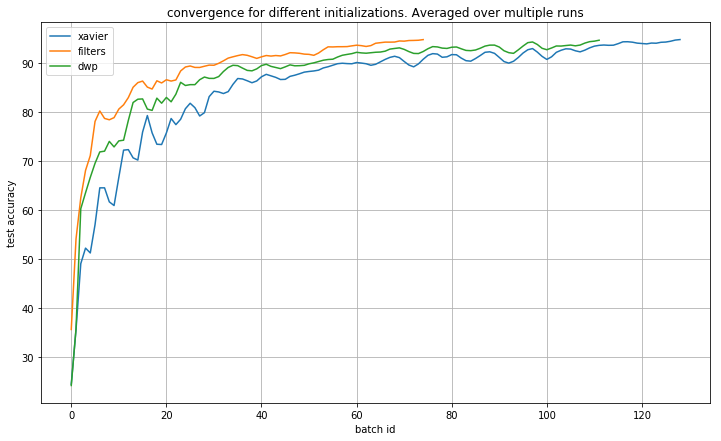

In [450]:
fig = plt.figure(figsize=[12,7])
plt.title('convergence for different initializations. Averaged over multiple runs')
plt.plot(np.array(accs_xavier).mean(0), data=None, label='xavier')
plt.plot(np.array(accs_filters).mean(0), label='filters')
plt.plot(np.array(accs_dwp).mean(0), label='dwp')
plt.xlabel('batch id')
plt.ylabel('test accuracy')
plt.legend()
plt.grid()
plt.show()

In [451]:
fig.savefig('init.png', dpi=300)